In [1]:
# A. Exploratory Data Analysis with some Data Visualization
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm



In [2]:

data=pd.read_csv('wine-clustering.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [6]:
#Checking the skewness of our dataset
data.skew()

Alcohol                -0.05
Malic_Acid              1.04
Ash                    -0.18
Ash_Alcanity            0.21
Magnesium               1.10
Total_Phenols           0.09
Flavanoids              0.03
Nonflavanoid_Phenols    0.45
Proanthocyanins         0.52
Color_Intensity         0.87
Hue                     0.02
OD280                  -0.31
Proline                 0.77
dtype: float64

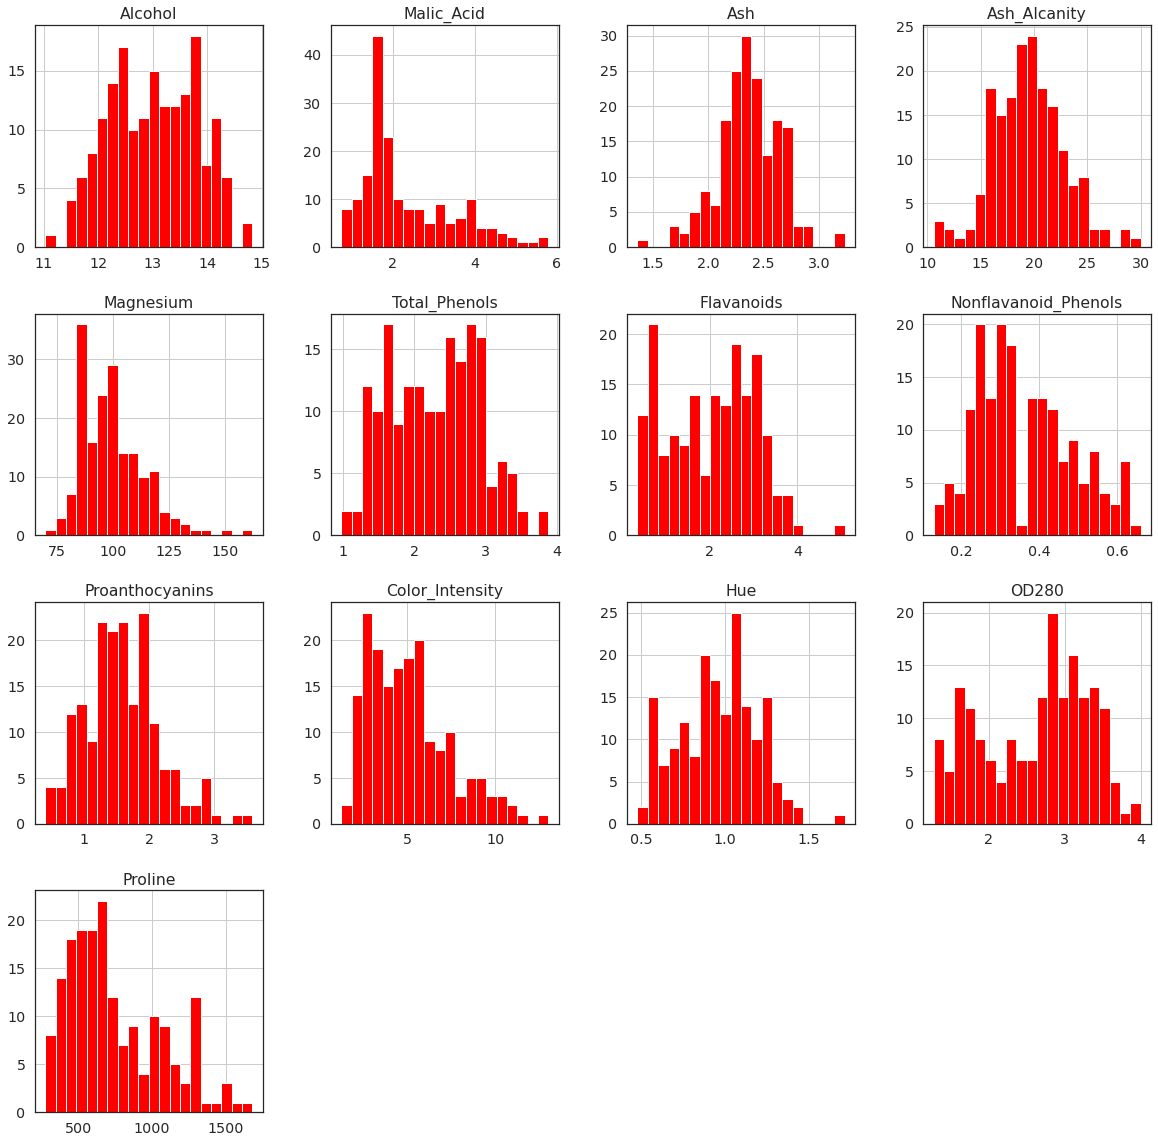

In [7]:
# plot histogram for all numerical variable to see the data distribution
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='red' )

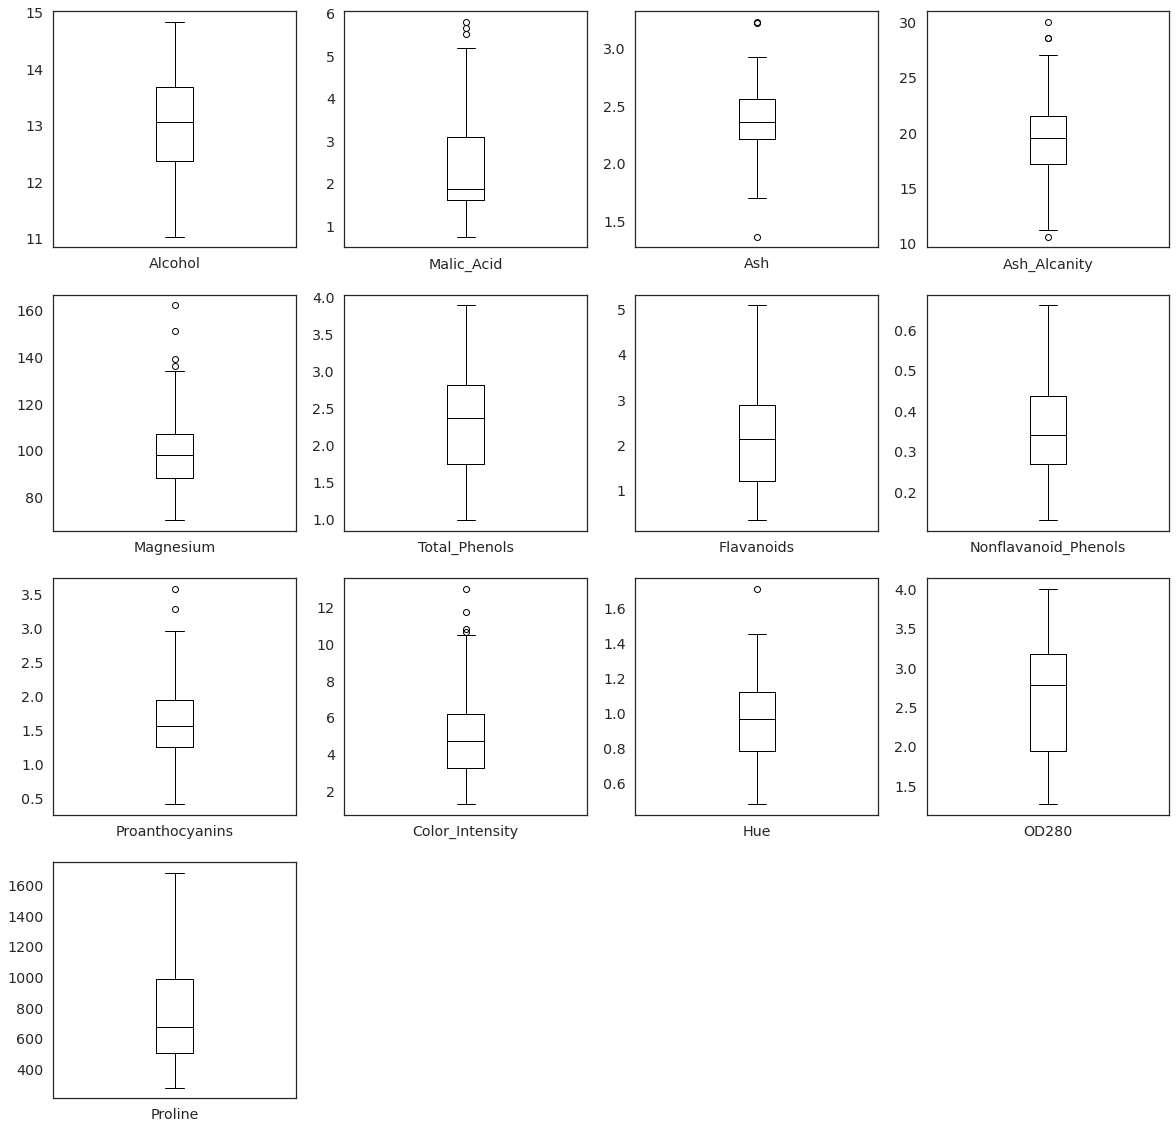

In [8]:
#boxplot to reinforce our insights about the data symmetry and their outliers
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [9]:
# Checking if there are null values, as we can see our dataset hasn`t null values
data.isnull().sum().sort_values(ascending=True).head()

Alcohol         0
Malic_Acid      0
Ash             0
Ash_Alcanity    0
Magnesium       0
dtype: int64

B. Data Preprocessing

In [10]:
# Scaling to standardize all features scale : Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=data.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [11]:
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


In [12]:
# PCA : using a Principal Component Analysis to reduce its dimension and make it "plottable" in a cartesian plane
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 55.41%


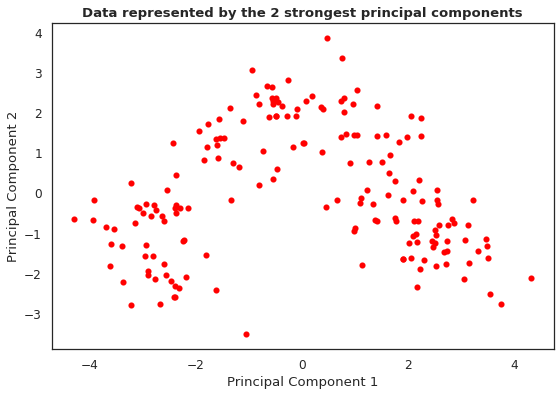

In [13]:
# plot the PCA result
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

C. Model Implementation

In [14]:
# We are using the K-means algorithm, to choose K (number of clusters) using 2 techniques: 
# the Silhouette Score and K-means Inertia (with Elbow analysis)
# 1. Compute all inertias. The lower the Inertia the better the clustering

import sklearn.cluster as cluster

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 10.30it/s]


In [15]:
# 2. Compute the silhouette score. The bigger score the better the clustering

from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:01<00:00,  6.93it/s]


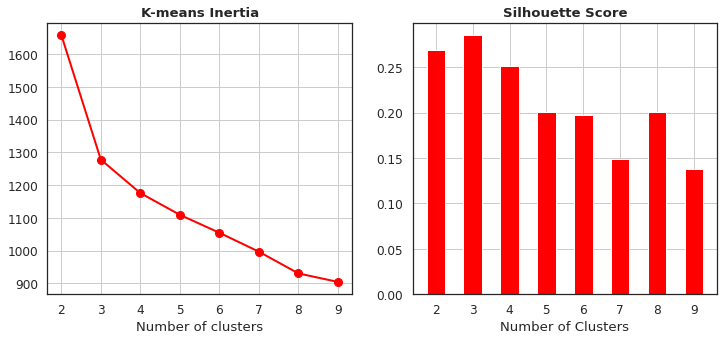

In [16]:
# plot the inertia
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

#plot the shilhouette result
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

In [17]:
# K-Means with K=3 since all the metrics indicates that it is the best clusters number

kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


2    65
1    62
0    51
dtype: int64

In [ ]:
# Visualize each feature distribution according to each cluster, 
# in this step we can define some characteristics for each group

data2=data.copy()
data2['Cluster']=kmeans_labels

aux=data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

In [ ]:
# Another approach, is looking each cluster centroid to define the cluster characteristics
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=data.columns)
centroids_data.head()

D. PCA Clusters Visualization


In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()